### Решающие Деревья

#### Задача 6 (5 баллов). 

Задачка-подсказка:

У Винни-Пуха есть 100 песенок. Каждый день он выбирает и поёт одну из них равновероятно наугад. Одну и ту же песенку он может петь несколько
раз. Сколько в среднем песенок оказываются неспетыми за 100 дней?

$ P(\text{песенка не спета}) = 99/100   $

$ P(\text{песенка не спета за 100 дней}) = (99/100)^{100} =  0.366  $


In [134]:
(99/100)**100

0.3660323412732292

Вероятность того, что наблюдение не попадает в выборку,
устремите $n$ к бесконечности и воспользуйтесь вторым замечательным пределом.

$ P(\text{наблюдение не попадает в выборку}) = \lim_{n\to\infty}(n-1/n)^{n} = 1/e = 0.37$
.


In [139]:
from math import e
1/e

0.36787944117144233

Каждое дерево в случайном лесе строится с использованием примерно 63% выборки: 


$ P(\text{наблюдение попадает в выборку}) = 1 - 0.37 = 0.63$

#### Задача 7 (10 баллов). 

Выращиваем регрессионное дерево в домашних условиях:

In [141]:
x = np.array([0,1,2,3])
y = np.array([5,6,4,100])

Критерий деления вершины — минимизация квадратичной функции потерь. Критерий остановки — три листа. Зачем нужен критерий остановки? Как дерево ведёт себя с выбросами?

1 шаг

$x \leq 0$

In [149]:
y_pred = [y[0], np.mean(y[1:]), np.mean(y[1:]), np.mean(y[1:])]
y_pred

[5, 36.666666666666664, 36.666666666666664, 36.666666666666664]

In [150]:
np.sum((y - y_pred)**2) 

6018.666666666666

$x \leq 1$

In [153]:
y_pred = [np.mean(y[0:2]), np.mean(y[0:2]), np.mean(y[2:]), np.mean(y[2:])]
y_pred

[5.5, 5.5, 52.0, 52.0]

In [154]:
np.sum((y - y_pred)**2) 

4608.5

$x \leq 2$

In [157]:
y_pred = [np.mean(y[0:3]), np.mean(y[0:3]), np.mean(y[0:3]), np.mean(y[3])]
y_pred

[5.0, 5.0, 5.0, 100.0]

In [158]:
np.sum((y - y_pred)**2) 

2.0

Критерий $x \leq 2$ минимизирует ошибку на первом шаге

Выбросы отбрасываются уже на первом шаге 

2 шаг

$x \leq 0$

In [160]:
y_pred = [y[0], np.mean(y[1:3]), np.mean(y[1:3]), np.mean(y[3])]
y_pred

[5, 5.0, 5.0, 100.0]

In [161]:
np.sum((y - y_pred)**2) 

2.0

$x \leq 1$

In [163]:
y_pred = [np.mean(y[0:2]), np.mean(y[0:2]), np.mean(y[2]), np.mean(y[3])]
y_pred

[5.5, 5.5, 4.0, 100.0]

In [164]:
np.sum((y - y_pred)**2) 

0.5

Критерий $x \leq 1$ минимизирует ошибку на втором шаге. 

Получаем три листа. 

Если дальше продолжать разбиение, модель переобучится


#### Задача 8 (10 баллов). 

Вспоминаем про энтропию. На лекции мы говорили, что энтропия
случайной величины отвечает за то, насколько она непредсказуема и находится по формуле
$H(X) = −E(\ln f_X(x))$  для непрерывных величин и $H(X) = −E(\ln P(X = k))$ для дискретных
величин.

а) Случайная величина $X$ принимает два значения: 0 с вероятностью $p$ и 1 с вероятностью $1−p$.
Постройте график зависимости энтропии от $p$. При каком $p$ энтропия будет максимальной?
Проинтерпретируйте это. Является ли функция монотонной? Выпуклой?

$$H = - E (\ln p(x=k) ) = - p \ln p  - (1-p) \ln (1-p)   $$

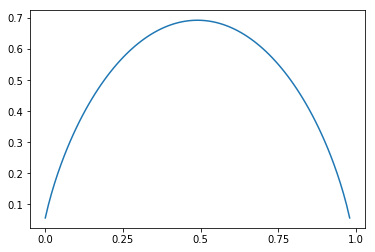

In [182]:
plt.plot([ - p * np.log(p) - (1-p)* np.log(1-p) for p in np.linspace(0, 1, num=101)[1:-1] ])
plt.xticks(np.linspace(0, 100, num=5), np.linspace(0, 1, num=5) );

$$\frac{\partial H}{\partial p}  = \ln \frac{1-p}{p} = 0 $$

Энтропия максимльна при $p = 1/2$, т.к. мы не знаем какое событие более вероятно, то есть не имеем дополнительной информации об этом. 

Функция монотонно возрастает  на $(0;1/2]$,  убывает  на $(1/2;1)$

$$\frac{\partial^2 H}{\partial p^2}  =  \frac{-1}{p(1-p)} $$

$\frac{\partial^2 H}{\partial p^2}$ меньше нуля на $(0;1) \Rightarrow $ функция выпуклая

б) Пусть теперь $X ∼ Exp(α)$. Найдите энтропию для случайной величины $X$. Как она зависит
от $α$? Нарисуйте для разных $α$ функцию плотности случайной величины $X$ и поясните эту
зависимость.

$$H =  -  E(\ln f_X(x)) =  -  E(\ln \alpha e^{-\alpha x})  = -  E(\ln \alpha -  \alpha x )  \\= - \ln \alpha + \alpha E( x )  = 1  - \ln \alpha 
$$

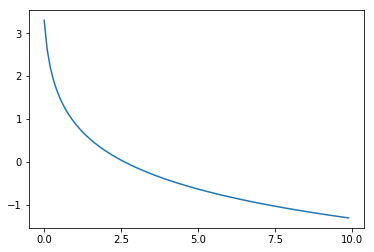

In [186]:
plt.plot([ 1 - np.log(p) for p in np.linspace(0, 10, num=101)[1:] ])
plt.xticks(np.linspace(0, 100, num=5), np.linspace(0, 10, num=5) );

Чем выше  $\alpha$, тем менее полога функция распределения величины $X$ с экспоненциальным законом, тем точнее мы можем предсказать значение $X$, тем ниже энтропия.